## Load Interaction and Configs
The interaction class allows the environment object and the agent object to interface with one another
The interaction class is parameterized by a configuration file. This is where you define parameters for:

AGENT: # hidden layers, # nodes per layer, size of memory, etc. 

INTERACTION: how many training episodes, type of epsilon decay, number of testing episodes, etc. 

In [1]:
%load_ext autoreload
%autoreload 2

The autoreload module is not an IPython extension.


UsageError: Line magic function `%autoreload` not found.


In [1]:
# IMPORT DESIRED INTERACTION CLASS AND CONFIGURATION
import sys
import os

# Get the parent directory (where `configs/` and `interactions/` are located)
parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Add it to sys.path
sys.path.append(parent_dir)

# Now you should be able to import
from interactions import dqn_interaction as dqn
from configs.dqn_configs import interaction_example_lunarlander, agent_example_lunarlander, env_lunar_lander_config
from configs.llm_configs import lunar_llm_agent_configs

In [2]:
# Initialize an interaction using this configuration
dqn_interaction = dqn.DQNInteraction(interaction_configs = interaction_example_lunarlander,
                                     agent_configs = agent_example_lunarlander,
                                     env_configs = env_lunar_lander_config,
                                     llm_configs = lunar_llm_agent_configs)



INFO 04-27 12:44:32 __init__.py:207] Automatically detected platform cuda.
INFO 04-27 12:44:38 config.py:549] This model supports multiple tasks: {'classify', 'embed', 'reward', 'generate', 'score'}. Defaulting to 'generate'.
INFO 04-27 12:44:38 llm_engine.py:234] Initializing a V0 LLM engine (v0.7.3) with config: model='deepseek-ai/deepseek-llm-7b-chat', speculative_config=None, tokenizer='deepseek-ai/deepseek-llm-7b-chat', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, override_neuron_config=None, tokenizer_revision=None, trust_remote_code=True, dtype=torch.bfloat16, max_seq_len=4096, download_dir=None, load_format=auto, tensor_parallel_size=1, pipeline_parallel_size=1, disable_custom_all_reduce=False, quantization=None, enforce_eager=False, kv_cache_dtype=auto,  device_config=cuda, decoding_config=DecodingConfig(guided_decoding_backend='xgrammar'), observability_config=ObservabilityConfig(otlp_traces_endpoint=None, collect_model_forward_time=False, collect_model_exec

Loading pt checkpoint shards:   0% Completed | 0/2 [00:00<?, ?it/s]


INFO 04-27 12:44:44 model_runner.py:1115] Loading model weights took 12.8726 GB
INFO 04-27 12:44:45 worker.py:267] Memory profiling takes 0.39 seconds
INFO 04-27 12:44:45 worker.py:267] the current vLLM instance can use total_gpu_memory (139.84GiB) x gpu_memory_utilization (0.90) = 125.85GiB
INFO 04-27 12:44:45 worker.py:267] model weights take 12.87GiB; non_torch_memory takes 0.16GiB; PyTorch activation peak memory takes 0.99GiB; the rest of the memory reserved for KV Cache is 111.83GiB.
INFO 04-27 12:44:45 executor_base.py:111] # cuda blocks: 15269, # CPU blocks: 546
INFO 04-27 12:44:45 executor_base.py:116] Maximum concurrency for 4096 tokens per request: 59.64x
INFO 04-27 12:44:47 model_runner.py:1434] Capturing cudagraphs for decoding. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI. If out-of-memory error occurs during cudagraph capture, consider decreasing `gpu_memor

Capturing CUDA graph shapes: 100%|██████████| 35/35 [00:09<00:00,  3.73it/s]

INFO 04-27 12:44:56 model_runner.py:1562] Graph capturing finished in 9 secs, took 0.30 GiB
INFO 04-27 12:44:56 llm_engine.py:436] init engine (profile, create kv cache, warmup model) took 12.02 seconds


In [3]:
# Train an agent
train_scores, trained_agent = dqn_interaction.train()

env name: lunarlander-v3
Entered lunarlander


  0%|          | 0/50 [00:00<?, ?it/s]

INFO 04-27 12:44:57 chat_utils.py:332] Detected the chat template content format to be 'string'. You can set `--chat-template-content-format` to override this.


  2%|▏         | 1/50 [00:13<10:56, 13.40s/it]

Unrecognized action: i will respond with the index corresponding to the action you want to take:

please specify the action you would like me to take.


100%|██████████| 50/50 [00:25<00:00,  1.95it/s]


In [9]:
# Test the agent
test_scores = dqn_interaction.test(trained_agent)

In [10]:
print(test_scores)

None


ValueError: x, y, and format string must not be None

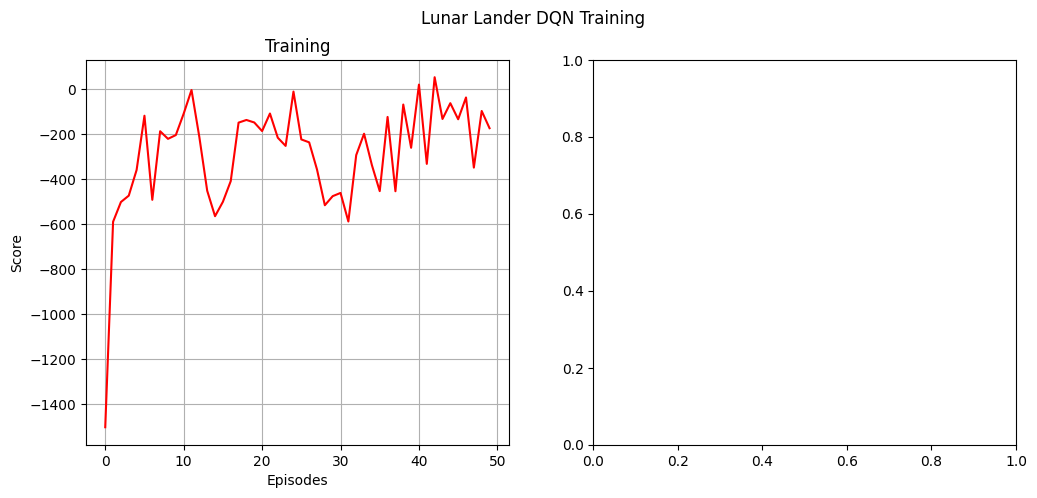

In [6]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))  # Adjust figure size if needed
fig.suptitle(f"Lunar Lander DQN Training ")

# Training plot
ax1.plot(train_scores, color='r')
ax1.set_title('Training')
ax1.set_xlabel('Episodes')
ax1.set_ylabel('Score')
ax1.grid()

# Testing plot
ax2.plot(test_scores, color='b')
ax2.set_title('Testing')
ax2.set_xlabel('Episodes')
ax2.set_ylabel('Score')
ax2.grid()

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


